In [1]:
import pandas as pd
import numpy as np
import pickle 
import re 

%pprint            # to turn off pretty printing

Pretty printing has been turned OFF


In [2]:
# Reading in the csv files. We're using the whole copora to do some larger quantitative analysis on a larger scale
cepa = pd.read_csv("../private/cepa.csv", index_col=[0])

# PELIC - will need to be filtered a bit
f = open('/Users/elenacimino/Data-Archive/combo_df_1A_pt1.pkl', 'rb')
data = pickle.load(f)
f.close()

target_langs = ['Arabic', 'Korean', 'Spanish']
filters = (data.native_language.isin(target_langs)) & \
          (data.version == 1) & (data.level_id >= 3) & \
          (data.class_code == 'w')

# apply filters to data to get target data
pelic = data[filters]

In [3]:
pelic.sample(5)

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk
answer_id,,,,,,,,,,,
34001,4350,fx4,73694,Living Alone or Living with a Roommate\n\n ...,w,5,Korean,1,"[living, alone, or, living, with, a, roommate,...",576,"[Living, Alone, or, Living, with, a, Roommate,..."
8254,1257,fp9,25817,There is typical method to make a beautiful fl...,w,4,Korean,1,"[there, is, typical, method, to, make, a, beau...",16,"[There, is, typical, method, to, make, a, beau..."
22181,2937,dv1,50358,The English Language Institute (ELI) is a good...,w,3,Arabic,1,"[the, english, language, institute, eli, is, a...",217,"[The, English, Language, Institute, (, ELI, ),..."
30990,4049,dd3,68796,Doctors are people who studied Medicine ...,w,4,Arabic,1,"[doctors, are, people, who, studied, medicine,...",600,"[Doctors, are, people, who, studied, Medicine,..."
22814,2996,ck4,53496,The Similarities and Differences between US an...,w,4,Arabic,1,"[the, similarities, and, differences, between,...",444,"[The, Similarities, and, Differences, between,..."


In [4]:
cepa.sample(5)

,Filename,Level,Original_Text,Normalized_Essay,Revised_Essay,tokens,token_count,TTR,Guiraud,pos,lemmas
1350,200612138,2,"\t\t\t\tCEPA 2 200612138\n\n\nI fect, I love m...","I fect, I love my famaliy. I go with my father...","I fect, I love my famaliy. I go with my father...","['I', 'fect', ',', 'I', 'love', 'my', 'famaliy...",79,0.620253,5.512931,"[(I, 'PRP'), (fect, 'VBP'), (,, ','), (I, 'PRP...","['-PRON-', 'fect', ',', '-PRON-', 'love', '-PR..."
355,200612252,1,\t\t\t\tCEPA 1 200612252\n\n\n\nImagine you ba...,Imagine you bave just had the perfect holiday....,Imagine you bave just had the perfect holiday....,"['Imagine', 'you', 'bave', 'just', 'had', 'the...",46,0.608696,4.128375,"[(Imagine, 'VB'), (you, 'PRP'), (bave, 'VBP'),...","['imagine', '-PRON-', 'bave', 'just', 'have', ..."
1155,200620515,6,\t\t\t\tCEPA 6 200620515\n\n\n\nHaving a holid...,Having a holiday after hardworking week makes ...,Having a holiday after hardworking week makes ...,"['Having', 'a', 'holiday', 'after', 'hardworki...",223,0.506726,7.567040,"[(Having, 'VBG'), (a, 'DT'), (holiday, 'NN'), ...","['have', 'a', 'holiday', 'after', 'hardwork', ..."
218,200606987,4,\t\t\t\tCEPA 4 200606987\n\n\n\n ...,Topic A The worst weekend in my life was befor...,Topic A The worst weekend in my life was befor...,"['Topic', 'A', 'The', 'worst', 'weekend', 'in'...",268,0.425373,6.963658,"[(Topic, 'NN'), (A, 'NNP'), (The, 'DT'), (wors...","['topic', 'a', 'the', 'bad', 'weekend', 'in', ..."
752,200601066,5,\t\t\t\tCEPA 5 200601066\n\n\n\nThe best summe...,The best summer holiday I have ever spent was ...,The best summer holiday I have ever spent was ...,"['The', 'best', 'summer', 'holiday', 'I', 'hav...",208,0.572115,8.251165,"[(The, 'DT'), (best, 'JJS'), (summer, 'NN'), (...","['the', 'good', 'summer', 'holiday', '-PRON-',..."


In [5]:
# We need to add Guiraud's R to the pelic data

import math 
def get_GUI(toks):
    """All tokens are lowercased, punctuation is included. Requires math module be pre-loaded.
    Get Guiraud's R measure of lexical complexity by dividing set of lowercased tokens by the square root of total number of tokens.
    Guiraud (1954)"""
    all_toks = [x.lower() for x in toks]
    if len(all_toks) == 0:
        return 0
    else: return len(set(all_toks))/math.sqrt(len(all_toks))
    
pelic['Guiraud'] = pelic.toks_re.apply(get_GUI)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [6]:
# I previously POS-tagged the CEPA documents with spaCy, so I will use that to tag the pelic portion as well

# load in spacy
import spacy
nlp = spacy.load('en')

pos = []

for doc in nlp.pipe(pelic.text.astype('unicode').values):
    pos.append([(n.text, n.tag_) for n in doc])
    
pelic['pos'] = pos

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [7]:
pelic.head()

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk,Guiraud,pos
answer_id,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,"[First, ,, prepare, a, port, ,, loose, tea, ,,...",4.947179,"[(First, RB), (,, ,), (prepare, VB), (a, DT), ..."
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,"[By, time]",1.414214,"[(By, IN), (time, NN)]"
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,"[First, ,, prepare, your, cup, ,, loose, tea, ...",3.843076,"[(First, RB), (,, ,), (prepare, VB), (your, PR..."
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,"[I, organized, the, instructions, by, time, ,,...",3.718679,"[(I, PRP), (organized, VBD), (the, DT), (instr..."
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,"[In, my, country, ,, make, a, tea, is, very, e...",5.196152,"[(In, IN), (my, PRP$), (country, NN), (,, ,), ..."


In [8]:
type(pelic.pos[5][0][0])

<class 'str'>

In [9]:
# saving this out so I don't have to run this again later
pelic.to_csv('../private/pelic_tagged.csv')

In [10]:
arabic = pelic[pelic.native_language == 'Arabic']
korean = pelic[pelic.native_language == 'Korean']
spanish = pelic[pelic.native_language == 'Spanish']

spaCy nominal and article tagging is like so, found [here](https://spacy.io/api/annotation#pos-tagging):

|     Tag       |    POS        |     Description       |
| ------------- | ------------- | --------------------- | 
|  NN           | Noun          | Singular or  mass noun| 
| NNS           | Noun          | Plural noun           |
| NNP           | Proper Noun   | Proper noun, singular |
| NNPS          | Proper Noun   | Proper noun, plural   |
| DT            | Determiner    | Determiner            |

Because I'm interested in the articles used around nouns, I'll focusing on anything that's tagged as a noun and the article that comes before it -- is it a definite or indefinite article (classified as determiner class) or a lack of article (zero article)?

Of course, other determiners (e.g. 'this', 'that', 'those') are also classified as determiners, so we'll collect that information for visualization purposes, but I'm not super interested in it at the moment.

In [11]:
test = "I have a cat and that cat is my favorite cat in the whole wide world."
test2 = "Those cats I saw at a store down on Fifth Avenue were really the cutest cats I've ever seen in my life."
test3 = "I live on the Fifth Avenue."

# Spacy
one = []
t = nlp(test)
for tok in t:
    one.append((tok.text, tok.tag_))

two = []
t = nlp(test2)
for tok in t:
    two.append((tok.text, tok.tag_))

three = []
t = nlp(test3)
for tok in t:
    three.append((tok.text, tok.tag_))

In [12]:
one

[('I', 'PRP'), ('have', 'VBP'), ('a', 'DT'), ('cat', 'NN'), ('and', 'CC'), ('that', 'DT'), ('cat', 'NN'), ('is', 'VBZ'), ('my', 'PRP$'), ('favorite', 'JJ'), ('cat', 'NN'), ('in', 'IN'), ('the', 'DT'), ('whole', 'JJ'), ('wide', 'JJ'), ('world', 'NN'), ('.', '.')]

In [13]:
two

[('Those', 'DT'), ('cats', 'NNS'), ('I', 'PRP'), ('saw', 'VBD'), ('at', 'IN'), ('a', 'DT'), ('store', 'NN'), ('down', 'RP'), ('on', 'IN'), ('Fifth', 'NNP'), ('Avenue', 'NNP'), ('were', 'VBD'), ('really', 'RB'), ('the', 'DT'), ('cutest', 'JJS'), ('cats', 'NNS'), ('I', 'PRP'), ("'ve", 'VB'), ('ever', 'RB'), ('seen', 'VBN'), ('in', 'IN'), ('my', 'PRP$'), ('life', 'NN'), ('.', '.')]

In [14]:
three

[('I', 'PRP'), ('live', 'VBP'), ('on', 'IN'), ('the', 'DT'), ('Fifth', 'NNP'), ('Avenue', 'NNP'), ('.', '.')]

In [15]:
top = [1, 3, 7, 8, 3, -3, 3, 0]
hits = (i for i,value in enumerate(top) if value == 3)
for i in hits:
    print("index:", i)
    print(top[i])
    print('---')

index: 1
3
---
index: 4
3
---
index: 6
3
---


In [16]:
def findArticles(tokens):
    """Checks a list of tokens that have been POS-tagged with spaCyand are in the format [('tok', 'pos')...]. 
    Finds all nouns and looks at the word immediately before it to judge whether or not it is a determiner.
    Returns a list of all nouns and some basic information about them. The format of the returned list is:
    [('tok', isDefinite, isIndefinite, isZero, isPossessive, isPlural, isProper)], where everything after 'tok' is Boolean."""
    lst = []
    sing_reg = (i for i,value in enumerate(tokens) if value[1] == 'NN')
    pl_reg = (i for i,value in enumerate(tokens) if value[1] == 'NNS')
    sing_prop = (i for i,value in enumerate(tokens) if value[1] == 'NNP')
    pl_prop = (i for i,value in enumerate(tokens) if value[1] == 'NNPS')
    for w in tokens:
        # singular non-proper nouns
        for i in sing_reg:
            noun = tokens[i]
            prev = tokens[i-1]
            if prev[1] == 'DT':
                if prev[0] == 'The' or prev[0] == 'the':
                    lst.append((noun[0], 1, 0 , 0, 0, 0, 0))
                elif prev[0] == 'A' or prev[0] == 'An' or prev[0] == 'a' or prev[0] == 'an':
                    lst.append((noun[0], 0, 1 , 0, 0, 0, 0))
                else: lst.append((noun[0], 0, 0 , 0, 0, 0, 0))
            elif prev[1] == 'PRP$':
                lst.append((noun[0], 0, 0 , 0, 1, 0, 0))
            else:
                lst.append((noun[0], 0, 0 , 1, 0, 0, 0))
        # plural non-proper nouns
        for i in pl_reg:
            noun = tokens[i]
            prev = tokens[i-1]
            if prev[1] == 'DT':
                if prev[0] == 'The' or prev[0] == 'the':
                    lst.append((noun[0], 1, 0 , 0, 0, 1, 0))
                elif prev[0] == 'A' or prev[0] == 'An' or prev[0] == 'a' or prev[0] == 'an':
                    lst.append((noun[0], 0, 1 , 0, 0, 1, 0))
                else: lst.append((noun[0], 0, 0 , 0, 0, 1, 0))
            elif prev[1] == 'PRP$':
                lst.append((noun[0], 0, 0 , 0, 1, 1, 0))
            else:
                lst.append((noun[0], 0, 0 , 1, 0, 1, 0))        
        # singular proper nouns
        for i in sing_prop:
            noun = tokens[i]
            prev = tokens[i-1]
            if prev[1] != 'NNP':
                if prev[1] == 'DT':
                    if prev[0] == 'The' or prev[0] == 'the':
                        lst.append((noun[0], 1, 0 , 0, 0, 0, 1))
                    elif prev[0] == 'A' or prev[0] == 'An' or prev[0] == 'a' or prev[0] == 'an':
                        lst.append((noun[0], 0, 1 , 0, 0, 0, 1))
                    else: lst.append((noun[0], 0, 0 , 0, 0, 0, 1))
                elif prev[1] == 'PRP$':
                    lst.append((noun[0], 0, 0 , 0, 1, 0, 1))
                else:
                    lst.append((noun[0], 0, 0 , 1, 0, 0, 1))                                    
            else: 
                two = tokens[i-2]
                if two[1] == 'DT':
                    if two[0] == 'The' or two[0] == 'the':
                        lst.append((noun[0], 1, 0 , 0, 0, 0, 1, 'long'))
                    elif two[0] == 'A' or two[0] == 'An' or two[0] == 'a' or two[0] == 'an':
                        lst.append((noun[0], 0, 1 , 0, 0, 0, 1, 'long'))
                    else: lst.append((noun[0], 0, 0 , 0, 0, 0, 1, 'long'))
                elif two[1] == 'PRP$':
                    lst.append((noun[0], 0, 0 , 0, 1, 0, 1, 'long'))
                else:
                    lst.append((noun[0], 0, 0 , 1, 0, 0, 1, 'long'))
        # plural proper nouns
        for i in pl_prop:
            noun = tokens[i]
            prev = tokens[i-1]
            if prev[1] != 'NNP':
                if prev[1] == 'DT':
                    if prev[0] == 'The' or prev[0] == 'the':
                        lst.append((noun[0], 1, 0 , 0, 0, 1, 1))
                    elif prev[0] == 'A' or prev[0] == 'An' or prev[0] == 'a' or prev[0] == 'an':
                        lst.append((noun[0], 0, 1 , 0, 0, 1, 1))
                    else: lst.append((noun[0], 0, 0 , 0, 0, 1, 1))
                elif prev[1] == 'PRP$':
                    lst.append((noun[0], 0, 0 , 0, 1, 1, 1))
                else:
                    lst.append((noun[0], 0, 0 , 1, 0, 1, 1))
            else: 
                two = tokens[i-2]
                if two[1] == 'DT':
                    if two[0] == 'The' or two[0] == 'the':
                        lst.append((noun[0], 1, 0 , 0, 0, 1, 1, 'long'))
                    elif two[0] == 'A' or two[0] == 'An' or two[0] == 'a' or two[0] == 'an':
                        lst.append((noun[0], 0, 1 , 0, 0, 1, 1, 'long'))
                    else: lst.append((noun[0], 0, 0 , 0, 0, 1, 1, 'long'))
                elif two[1] == 'PRP$':
                    lst.append((noun[0], 0, 0 , 0, 1, 1, 1, 'long'))
                else:
                    lst.append((noun[0], 0, 0 , 1, 0, 1, 1, 'long'))
    long = (i for i,value in enumerate(lst) if value[-1] == 'long')
    for i in long:
        prev = lst[i-1]
        lst.remove(prev)
    return lst

In [17]:
print(one)
findArticles(one)

[('I', 'PRP'), ('have', 'VBP'), ('a', 'DT'), ('cat', 'NN'), ('and', 'CC'), ('that', 'DT'), ('cat', 'NN'), ('is', 'VBZ'), ('my', 'PRP$'), ('favorite', 'JJ'), ('cat', 'NN'), ('in', 'IN'), ('the', 'DT'), ('whole', 'JJ'), ('wide', 'JJ'), ('world', 'NN'), ('.', '.')]


[('cat', 0, 1, 0, 0, 0, 0), ('cat', 0, 0, 0, 0, 0, 0), ('cat', 0, 0, 1, 0, 0, 0), ('world', 0, 0, 1, 0, 0, 0)]

In [18]:
print(two)
findArticles(two)

[('Those', 'DT'), ('cats', 'NNS'), ('I', 'PRP'), ('saw', 'VBD'), ('at', 'IN'), ('a', 'DT'), ('store', 'NN'), ('down', 'RP'), ('on', 'IN'), ('Fifth', 'NNP'), ('Avenue', 'NNP'), ('were', 'VBD'), ('really', 'RB'), ('the', 'DT'), ('cutest', 'JJS'), ('cats', 'NNS'), ('I', 'PRP'), ("'ve", 'VB'), ('ever', 'RB'), ('seen', 'VBN'), ('in', 'IN'), ('my', 'PRP$'), ('life', 'NN'), ('.', '.')]


[('store', 0, 1, 0, 0, 0, 0), ('life', 0, 0, 0, 1, 0, 0), ('cats', 0, 0, 0, 0, 1, 0), ('cats', 0, 0, 1, 0, 1, 0), ('Avenue', 0, 0, 1, 0, 0, 1, 'long')]

In [19]:
print(three)
findArticles(three)

[('I', 'PRP'), ('live', 'VBP'), ('on', 'IN'), ('the', 'DT'), ('Fifth', 'NNP'), ('Avenue', 'NNP'), ('.', '.')]


[('Avenue', 1, 0, 0, 0, 0, 1, 'long')]

In [20]:
pelic['article_info'] = pelic.pos.apply(findArticles)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
pelic.head()

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk,Guiraud,pos,article_info
answer_id,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,"[First, ,, prepare, a, port, ,, loose, tea, ,,...",4.947179,"[(First, RB), (,, ,), (prepare, VB), (a, DT), ...","[(port, 0, 1, 0, 0, 0, 0), (tea, 0, 0, 1, 0, 0..."
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,"[By, time]",1.414214,"[(By, IN), (time, NN)]","[(time, 0, 0, 1, 0, 0, 0)]"
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,"[First, ,, prepare, your, cup, ,, loose, tea, ...",3.843076,"[(First, RB), (,, ,), (prepare, VB), (your, PR...","[(cup, 0, 0, 0, 1, 0, 0), (tea, 0, 0, 1, 0, 0,..."
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,"[I, organized, the, instructions, by, time, ,,...",3.718679,"[(I, PRP), (organized, VBD), (the, DT), (instr...","[(time, 0, 0, 1, 0, 0, 0), (beacause, 0, 0, 1,..."
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,"[In, my, country, ,, make, a, tea, is, very, e...",5.196152,"[(In, IN), (my, PRP$), (country, NN), (,, ,), ...","[(country, 0, 0, 0, 1, 0, 0), (tea, 0, 1, 0, 0..."


`[('tok1', isDefinite, isIndefinite, isZero, isPossessive, isPlural, isProper, 'long'?)]`
- isDef = 1
- isIndef = 2
- isZero = 3
- isPoss = 4
- isPlu = 5
- isProp = 6

In [22]:
from collections import Counter

# these will do total counts
def isDefinite(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def isIndefinite(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[2] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def isZero(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[3] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def isPossessive(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[4] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def isOther(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 0 and entry[2] == 0 and entry[3] == 0 and entry[4] == 0:
            values.append(entry[0])
    c.update(values)
    return c

In [23]:
# these are fine-tuned. may or may not use them.
def RegSingDefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 1 and entry[5] == 0 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def RegPlDefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 1 and entry[5] == 1 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def PropSingDefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 1 and entry[5] == 0 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def PropPlDefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 1 and entry[5] == 1 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def RegSingIndefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[2] == 1 and entry[5] == 0 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def RegPlIndefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[2] == 1 and entry[2] == 1 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def PropSingIndefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[2] == 1 and entry[5] == 0 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def PropPlIndefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[2] == 1 and entry[5] == 1 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def RegSingZeroNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[3] == 1 and entry[5] == 0 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def RegPlZeroNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[3] == 1 and entry[5] == 1 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def PropSingZeroNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[3] == 1 and entry[5] == 0 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def PropPlZeroNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[3] == 1 and entry[5] == 1 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def RegSingPossNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[4] == 1 and entry[5] == 0 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def RegPlPossNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[4] == 1 and entry[5] == 1 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def PropSingPossNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[4] == 1 and entry[5] == 0 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def PropPlPossNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[4] == 1 and entry[5] == 1 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def RegSingOtherNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 0 and entry[2] == 0 and entry[3] == 0 and entry[4] == 0 and entry[5] == 0 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def RegPlOtherNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 0 and entry[2] == 0 and entry[3] == 0 and entry[4] == 0 and entry[5] == 1 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def PropSingOtherNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 0 and entry[2] == 0 and entry[3] == 0 and entry[4] == 0 and entry[5] == 0 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def PropPlOtherNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 0 and entry[2] == 0 and entry[3] == 0 and entry[4] == 0 and entry[5] == 1 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

In [24]:
print(three)
findArticles(three)

[('I', 'PRP'), ('live', 'VBP'), ('on', 'IN'), ('the', 'DT'), ('Fifth', 'NNP'), ('Avenue', 'NNP'), ('.', '.')]


[('Avenue', 1, 0, 0, 0, 0, 1, 'long')]

In [25]:
isDefinite(findArticles(three))

Counter({'Avenue': 1})

In [26]:
isDefinite(findArticles(one))

Counter()

In [27]:
len(isDefinite(findArticles(three)))

1

In [28]:
test4 = "the cat ate a mouse by the door in the house by a river in the sea i am tired"

four = []
t = nlp(test4)
for tok in t:
    four.append((tok.text, tok.tag_))

In [29]:
print(four)
print(findArticles(four))
len(isDefinite(findArticles(four)))

[('the', 'DT'), ('cat', 'NN'), ('ate', 'VBD'), ('a', 'DT'), ('mouse', 'NN'), ('by', 'IN'), ('the', 'DT'), ('door', 'NN'), ('in', 'IN'), ('the', 'DT'), ('house', 'NN'), ('by', 'IN'), ('a', 'DT'), ('river', 'NN'), ('in', 'IN'), ('the', 'DT'), ('sea', 'NN'), ('i', 'PRP'), ('am', 'VBP'), ('tired', 'JJ')]
[('cat', 1, 0, 0, 0, 0, 0), ('mouse', 0, 1, 0, 0, 0, 0), ('door', 1, 0, 0, 0, 0, 0), ('house', 1, 0, 0, 0, 0, 0), ('river', 0, 1, 0, 0, 0, 0), ('sea', 1, 0, 0, 0, 0, 0)]


4

In [31]:
pelic.head()

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk,Guiraud,pos,article_info
answer_id,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,"[First, ,, prepare, a, port, ,, loose, tea, ,,...",4.947179,"[(First, RB), (,, ,), (prepare, VB), (a, DT), ...","[(port, 0, 1, 0, 0, 0, 0), (tea, 0, 0, 1, 0, 0..."
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,"[By, time]",1.414214,"[(By, IN), (time, NN)]","[(time, 0, 0, 1, 0, 0, 0)]"
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,"[First, ,, prepare, your, cup, ,, loose, tea, ...",3.843076,"[(First, RB), (,, ,), (prepare, VB), (your, PR...","[(cup, 0, 0, 0, 1, 0, 0), (tea, 0, 0, 1, 0, 0,..."
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,"[I, organized, the, instructions, by, time, ,,...",3.718679,"[(I, PRP), (organized, VBD), (the, DT), (instr...","[(time, 0, 0, 1, 0, 0, 0), (beacause, 0, 0, 1,..."
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,"[In, my, country, ,, make, a, tea, is, very, e...",5.196152,"[(In, IN), (my, PRP$), (country, NN), (,, ,), ...","[(country, 0, 0, 0, 1, 0, 0), (tea, 0, 1, 0, 0..."


In [32]:
pelic['all_def'] = pelic.article_info.apply(isDefinite)
pelic['all_indef'] = pelic.article_info.apply(isIndefinite)
pelic['all_zero'] = pelic.article_info.apply(isZero)
pelic['all_poss'] = pelic.article_info.apply(isPossessive)
pelic['all_other'] = pelic.article_info.apply(isOther)

pelic.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk,Guiraud,pos,article_info,all_def,all_indef,all_zero,all_poss,all_other
answer_id,,,,,,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,"[First, ,, prepare, a, port, ,, loose, tea, ,,...",4.947179,"[(First, RB), (,, ,), (prepare, VB), (a, DT), ...","[(port, 0, 1, 0, 0, 0, 0), (tea, 0, 0, 1, 0, 0...","{'port': 1, 'cup': 2, 'tea': 2, 'surface': 1}",{'port': 1},"{'tea': 4, 'cup': 1, 'water': 2, 'minutes': 1,...",{},{}
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,"[By, time]",1.414214,"[(By, IN), (time, NN)]","[(time, 0, 0, 1, 0, 0, 0)]",{},{},{'time': 1},{},{}
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,"[First, ,, prepare, your, cup, ,, loose, tea, ...",3.843076,"[(First, RB), (,, ,), (prepare, VB), (your, PR...","[(cup, 0, 0, 0, 1, 0, 0), (tea, 0, 0, 1, 0, 0,...","{'water': 1, 'cup': 1}",{'port': 1},"{'tea': 4, 'bag': 2, 'water': 1, 'Second': 1, ...","{'cup': 2, 'tea': 1}",{}
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,"[I, organized, the, instructions, by, time, ,,...",3.718679,"[(I, PRP), (organized, VBD), (the, DT), (instr...","[(time, 0, 0, 1, 0, 0, 0), (beacause, 0, 0, 1,...",{'instructions': 3},{},"{'time': 1, 'beacause': 1, 'tea': 3, 'step': 2...",{},{}
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,"[In, my, country, ,, make, a, tea, is, very, e...",5.196152,"[(In, IN), (my, PRP$), (country, NN), (,, ,), ...","[(country, 0, 0, 0, 1, 0, 0), (tea, 0, 1, 0, 0...","{'water': 1, 'cup': 1}","{'tea': 1, 'water': 1, 'pot': 1, 'cup': 1}","{'tea': 2, 'bag': 1, 'bags': 1, 'Fitst': 1}","{'country': 1, 'tea': 1}",{}


In [38]:
print(sum(pelic.all_def[5].values()))
sum(pelic.all_def[6].values())

6


0

In [46]:
pelic['sum_all_def'] = pelic.all_def.apply(lambda x: sum(x.values()))
pelic['sum_all_indef'] = pelic.all_indef.apply(lambda x: sum(x.values()))
pelic['sum_all_zero'] = pelic.all_zero.apply(lambda x: sum(x.values()))
pelic['sum_all_poss'] = pelic.all_poss.apply(lambda x: sum(x.values()))
pelic['sum_all_other'] = pelic.all_other.apply(lambda x: sum(x.values()))

pelic.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,...,all_def,all_indef,all_zero,all_poss,all_other,sum_all_def,sum_all_indef,sum_all_zero,sum_all_poss,sum_all_other
answer_id,,,,,,,,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,...,"{'port': 1, 'cup': 2, 'tea': 2, 'surface': 1}",{'port': 1},"{'tea': 4, 'cup': 1, 'water': 2, 'minutes': 1,...",{},{},6,1,11,0,0
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,...,{},{},{'time': 1},{},{},0,0,1,0,0
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,...,"{'water': 1, 'cup': 1}",{'port': 1},"{'tea': 4, 'bag': 2, 'water': 1, 'Second': 1, ...","{'cup': 2, 'tea': 1}",{},2,1,10,3,0
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,...,{'instructions': 3},{},"{'time': 1, 'beacause': 1, 'tea': 3, 'step': 2...",{},{},3,0,8,0,0
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,...,"{'water': 1, 'cup': 1}","{'tea': 1, 'water': 1, 'pot': 1, 'cup': 1}","{'tea': 2, 'bag': 1, 'bags': 1, 'Fitst': 1}","{'country': 1, 'tea': 1}",{},2,4,5,2,0


In [92]:
5 /7 *100

71.42857142857143

In [94]:
pelic['all_nouns'] = pelic.article_info.map(len)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
pelic.head()

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,...,all_indef,all_zero,all_poss,all_other,sum_all_def,sum_all_indef,sum_all_zero,sum_all_poss,sum_all_other,all_nouns
answer_id,,,,,,,,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,...,{'port': 1},"{'tea': 4, 'cup': 1, 'water': 2, 'minutes': 1,...",{},{},6,1,11,0,0,18
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,...,{},{'time': 1},{},{},0,0,1,0,0,1
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,...,{'port': 1},"{'tea': 4, 'bag': 2, 'water': 1, 'Second': 1, ...","{'cup': 2, 'tea': 1}",{},2,1,10,3,0,16
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,...,{},"{'time': 1, 'beacause': 1, 'tea': 3, 'step': 2...",{},{},3,0,8,0,0,11
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,...,"{'tea': 1, 'water': 1, 'pot': 1, 'cup': 1}","{'tea': 2, 'bag': 1, 'bags': 1, 'Fitst': 1}","{'country': 1, 'tea': 1}",{},2,4,5,2,0,13


In [96]:
# pelic['ratio_nouns'] = pelic.all_nouns.apply(getRatio)
pelic.all_nouns[15]/pelic.toks_re_len[15]

0.2708333333333333

In [97]:
pelic.sum_all_zero[15]/pelic.toks_re_len[15]

0.10416666666666667

In [99]:
pelic.sum_all_zero[15]/pelic.all_nouns[15]

0.38461538461538464

In [100]:
small = pelic.sample(3)

In [103]:
# def getRatio(num):
#     return num/pelic.toks_re_len
# small['n_ratio'] = small.all_nouns.apply(getRatio)
# small.head()

ValueError: Wrong number of items passed 5474, placement implies 1

Some visualization...

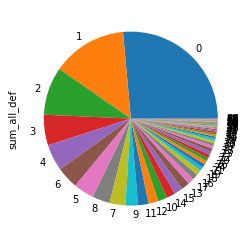

In [52]:
# pelic.T.plot.pie(subplots=True, figsize=(10, 3))

pelic.sum_all_def.value_counts(sort=True).plot.pie()
plt.show()

Text(0.5, 1.0, 'Token Count by Level and L1 (PELIC samples)')

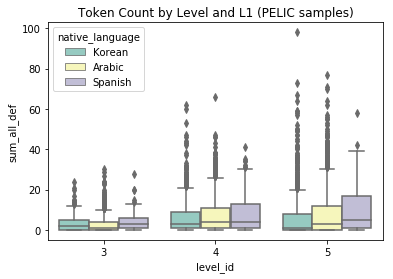

In [89]:
# g = sns.catplot(x="level_id", hue="native_language",
#                 data=pelic, kind="count",
#                 height=8, palette='Accent')

ax = sns.boxplot(x="level_id", y="sum_all_def", hue="native_language",
                 data=pelic, palette="Set3")
plt.title('Token Count by Level and L1 (PELIC samples)')